In [89]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [90]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [91]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [92]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [93]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

Base.classes.keys()

['measurement', 'station']

In [94]:
# View all of the classes that automap found
# Assign the variables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [95]:
# Save references to each table
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [96]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

<Axes: title={'center': 'Precipitation measurement per date'}, xlabel='Date', ylabel='Inches'>

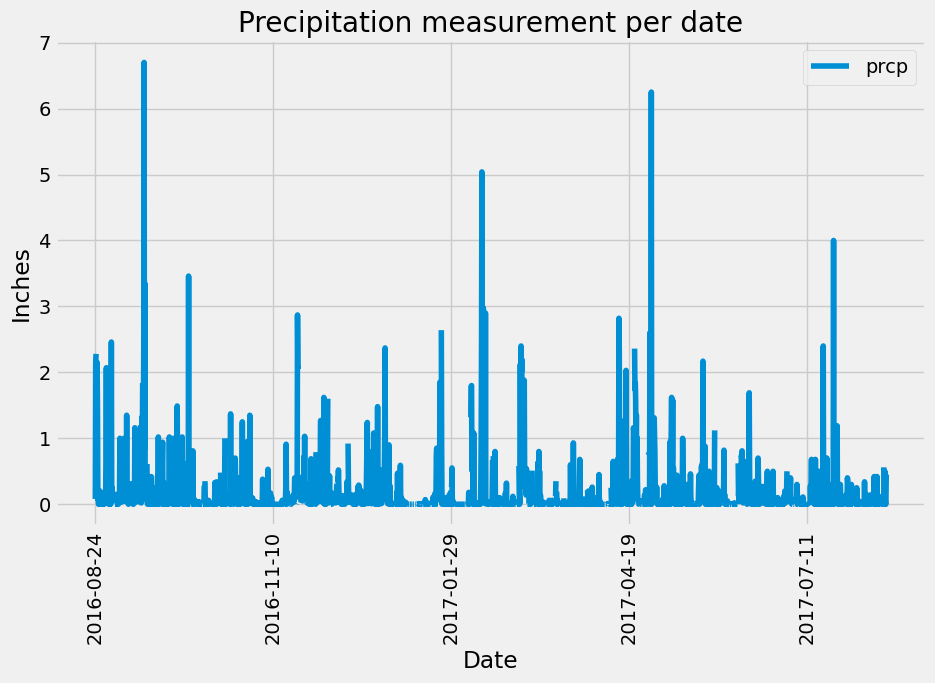

In [97]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the date and precipitation scores
df_1 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_2 = pd.DataFrame(df_1)
df_2

# Sort the dataframe by date
df_3 = df_2.sort_values("date")
df_3

# Use Pandas Plotting with Matplotlib to plot the data
df_3.plot(kind = 'line', x = "date", y = "prcp", title = "Precipitation measurement per date", xlabel = 'Date', ylabel = "Inches", rot=90, figsize=(10,6))


In [98]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_3["prcp"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [99]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count()

9

In [103]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = """SELECT
                station
                count(id) as observation_num
            FROM
                Measurement
            GROUP BY
                station
            ORDER BY
                observation_num desc;
"""

df_4 = pd.read_sql(text(query), con=engine)
df_4.head()

OperationalError: (sqlite3.OperationalError) near "(": syntax error
[SQL: SELECT
                station
                count(id) as observation_num
            FROM
                Measurement
            GROUP BY
                station
            ORDER BY
                observation_num desc;
]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [101]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [102]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [104]:
# Close Session
session.close()